Noah Mills Final Project DAT 350

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for correlation matrix 
import numpy as np #just for the math

In [2]:
# load in the data

rawDF = pd.read_csv("fishTable.csv")

rawDF.head()

,Seafood Item Category,Taxon (common name),Location of Study,"Mean Hg Concentration\n(ppm, wet weight)",Number of Samples,Data Source (See Supplemental Material for References)
0,Anchovies,anchovy,"(market, Turkey)",0.123,35,(Gunsen 2004)
1,Anchovies,anchovy,"(market, Brazil)",0.050,4,(Augelli et al. 2007)
2,Anchovies,anchovy,"(market, Spain)",0.080,3,(Domingo et al. 2007)
3,Anchovies,anchovy,"(market, UK)",0.050,2,(Food Standards Agency 2006)
4,Anchovies,anchovy-California,US-California,0.045,14,(Greenfield and Jahn 2010)


In [3]:
rawDF.describe()

,"Mean Hg Concentration\n(ppm, wet weight)",Number of Samples
count,1632.000000,1632.000000
mean,0.286435,40.293505
std,0.545481,131.985550
min,0.002000,1.000000
25%,0.048000,4.000000
50%,0.117000,12.000000
75%,0.318500,35.000000
max,10.520000,2158.000000


In [9]:
rawDF = rawDF.drop(["Location of Study", "Data Source (See Supplemental Material for References)", "Taxon (common name)", "Number of Samples"], axis = 1)

rawDF.head()

,Seafood Item Category,"Mean Hg Concentration\n(ppm, wet weight)"
0,Anchovies,0.123
1,Anchovies,0.050
2,Anchovies,0.080
3,Anchovies,0.050
4,Anchovies,0.045


In [11]:
categoricalCols = ["Seafood Item Category "]

categoricalCols

#separating the feature that arent numbers that we need to encode into numbers

['Seafood Item Category ']

In [12]:
from sklearn.preprocessing import OneHotEncoder

# instantiate and fit the one hot encoder
encoder = OneHotEncoder(sparse_output=False)
encoderArray = encoder.fit_transform(rawDF[categoricalCols])
colNames = encoder.get_feature_names_out()

# fix the shape
colNames = np.array(colNames).ravel()

# get the dataframe of the 
oneHotDF = pd.DataFrame(encoderArray, columns=colNames)

oneHotDF.head()

,Seafood Item Category _Anchovies,Seafood Item Category _Bass (Chilean),Seafood Item Category _Bass (Freshwater),"Seafood Item Category _Bass (Saltwater, Black, White, Striped)",Seafood Item Category _Bass (freshwater),Seafood Item Category _Bluefish,Seafood Item Category _Butterfish,Seafood Item Category _Carp,Seafood Item Category _Catfish,Seafood Item Category _Clams,...,Seafood Item Category _Tilefish,Seafood Item Category _Trout (freshwater),"Seafood Item Category _Trout (freshwater, farmed)",Seafood Item Category _Tuna (fresh/frozen),"Seafood Item Category _Tuna, Yellowfin canned","Seafood Item Category _Tuna, albacore (canned)","Seafood Item Category _Tuna, canned (light)","Seafood Item Category _Tuna, other",Seafood Item Category _Weakfish/Seatrout,Seafood Item Category _Whitefish
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df = pd.concat([rawDF, oneHotDF], axis=1).drop(columns = categoricalCols)

df.head()

,"Mean Hg Concentration\n(ppm, wet weight)",Seafood Item Category _Anchovies,Seafood Item Category _Bass (Chilean),Seafood Item Category _Bass (Freshwater),"Seafood Item Category _Bass (Saltwater, Black, White, Striped)",Seafood Item Category _Bass (freshwater),Seafood Item Category _Bluefish,Seafood Item Category _Butterfish,Seafood Item Category _Carp,Seafood Item Category _Catfish,...,Seafood Item Category _Tilefish,Seafood Item Category _Trout (freshwater),"Seafood Item Category _Trout (freshwater, farmed)",Seafood Item Category _Tuna (fresh/frozen),"Seafood Item Category _Tuna, Yellowfin canned","Seafood Item Category _Tuna, albacore (canned)","Seafood Item Category _Tuna, canned (light)","Seafood Item Category _Tuna, other",Seafood Item Category _Weakfish/Seatrout,Seafood Item Category _Whitefish
0,0.123,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.050,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.080,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.050,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.045,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


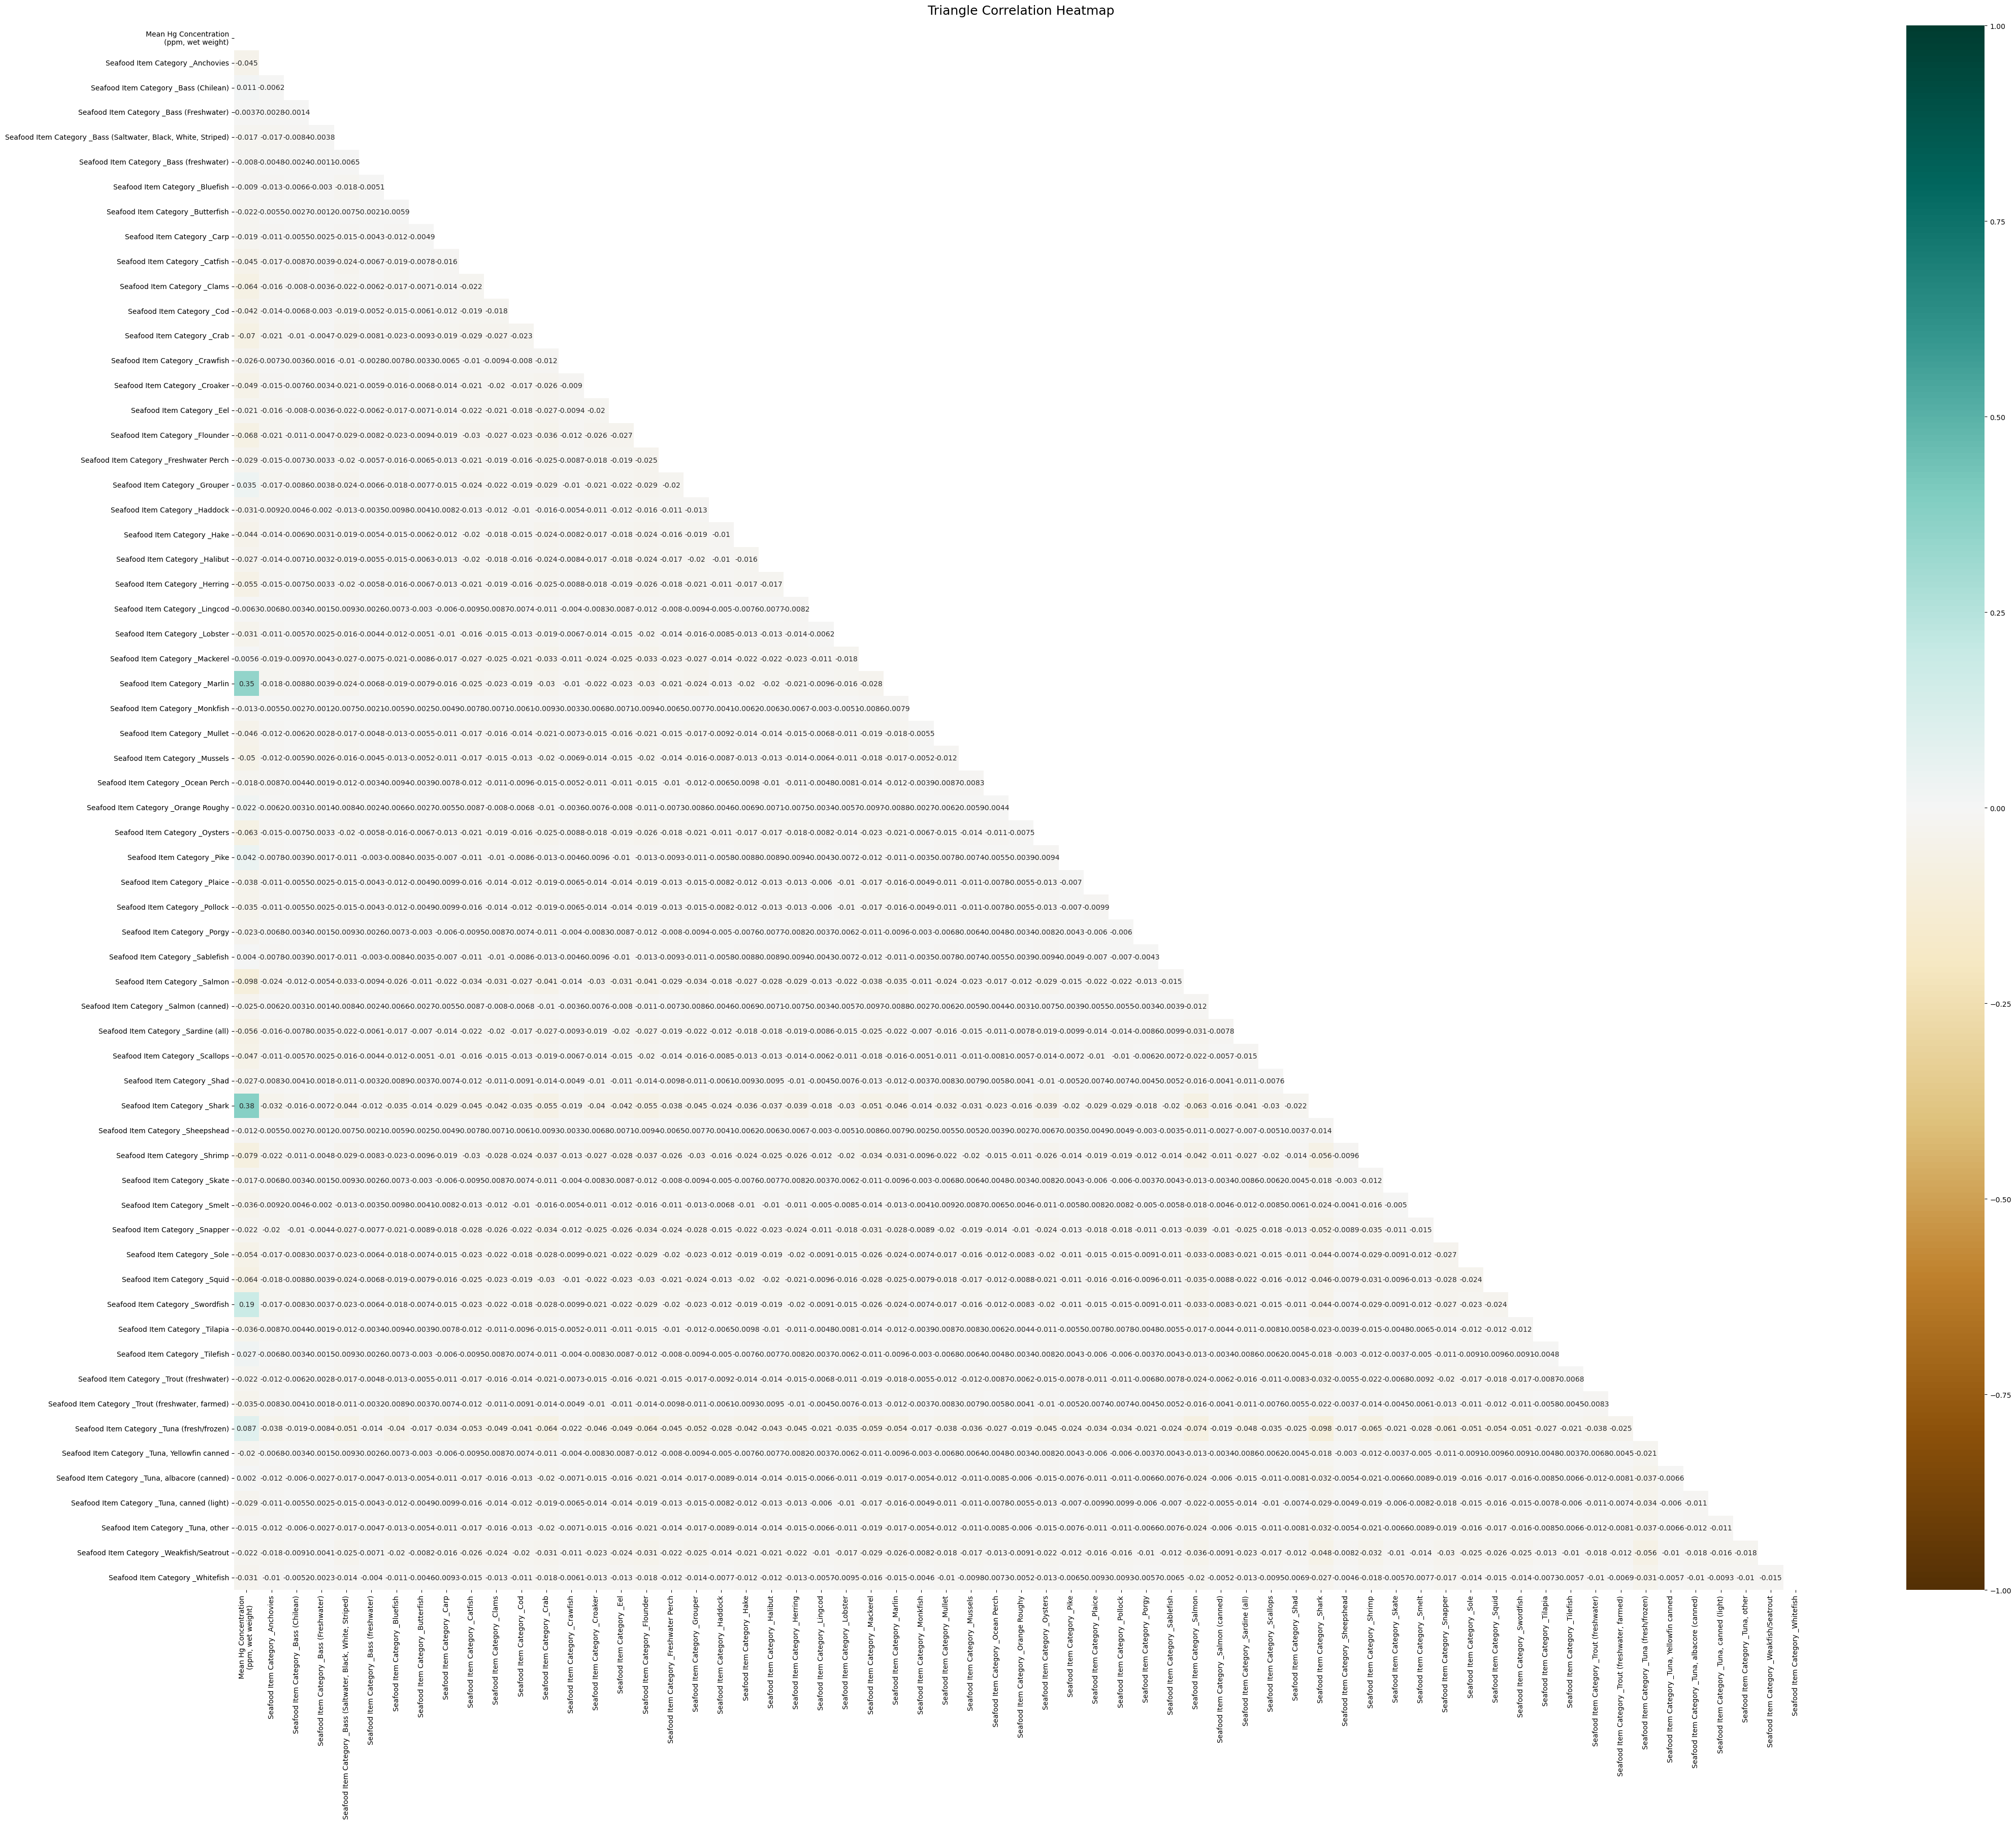

In [17]:
plt.figure(figsize=(50, 40))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [18]:
yDF = df["Mean Hg Concentration\n(ppm, wet weight)"] #just the HG measurements
xDF = df.drop(columns=["Mean Hg Concentration\n(ppm, wet weight)"], axis=1) #all features but HG measurements

print(xDF.columns)
xDF.head()

Index(['Seafood Item Category _Anchovies',
       'Seafood Item Category _Bass (Chilean)',
       'Seafood Item Category _Bass (Freshwater)',
       'Seafood Item Category _Bass (Saltwater, Black, White, Striped)',
       'Seafood Item Category _Bass (freshwater)',
       'Seafood Item Category _Bluefish', 'Seafood Item Category _Butterfish',
       'Seafood Item Category _Carp', 'Seafood Item Category _Catfish',
       'Seafood Item Category _Clams', 'Seafood Item Category _Cod',
       'Seafood Item Category _Crab', 'Seafood Item Category _Crawfish',
       'Seafood Item Category _Croaker', 'Seafood Item Category _Eel',
       'Seafood Item Category _Flounder',
       'Seafood Item Category _Freshwater Perch',
       'Seafood Item Category _Grouper', 'Seafood Item Category _Haddock',
       'Seafood Item Category _Hake', 'Seafood Item Category _Halibut',
       'Seafood Item Category _Herring', 'Seafood Item Category _Lingcod',
       'Seafood Item Category _Lobster', 'Seafood Item C

,Seafood Item Category _Anchovies,Seafood Item Category _Bass (Chilean),Seafood Item Category _Bass (Freshwater),"Seafood Item Category _Bass (Saltwater, Black, White, Striped)",Seafood Item Category _Bass (freshwater),Seafood Item Category _Bluefish,Seafood Item Category _Butterfish,Seafood Item Category _Carp,Seafood Item Category _Catfish,Seafood Item Category _Clams,...,Seafood Item Category _Tilefish,Seafood Item Category _Trout (freshwater),"Seafood Item Category _Trout (freshwater, farmed)",Seafood Item Category _Tuna (fresh/frozen),"Seafood Item Category _Tuna, Yellowfin canned","Seafood Item Category _Tuna, albacore (canned)","Seafood Item Category _Tuna, canned (light)","Seafood Item Category _Tuna, other",Seafood Item Category _Weakfish/Seatrout,Seafood Item Category _Whitefish
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
pd.DataFrame(yDF) #puts yDF in a table 

,"Mean Hg Concentration\n(ppm, wet weight)"
0,0.123
1,0.050
2,0.080
3,0.050
4,0.045
...,...
1627,0.036
1628,0.111
1629,0.095
1630,0.090


In [21]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(
    xDF, yDF, 
    test_size=0.05, #the test group is 5% of the training ones
    shuffle = True)

In [22]:
from sklearn.preprocessing import StandardScaler

xScaler = StandardScaler()
xColNames = xTrain.columns.values.tolist()
# train the scaler and apply it to the training set
xTrainScaled = xScaler.fit_transform(xTrain[xColNames])

#standardizes scales for each column so each column has the same range/scale
#dont scale Y, it wont hurt but its not needed

Testing models

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
from sklearn.linear_model import LinearRegression

parameters = {
    'fit_intercept':[True,False],
    'positive':[True, False]
    }
gridSearch = GridSearchCV(estimator = LinearRegression(),  
                           param_grid = parameters,
                           scoring = 'r2', #can be recall, accuracy, f1, precision (CLASSIFICATION ONLY)
                           cv = 5, #cv is cross validation, 5 being the number of times we split/train it
                           verbose=0) #0 means dont add comments, if its one, itll print info and it scales to 3


gridSearch.fit(xTrainScaled, yTrain) 

logisticParams = gridSearch.best_params_

logisticParams

{'fit_intercept': True, 'positive': True}

In [26]:
from sklearn.svm import SVR

parameters = {
    'C':[1,10,100,1000],
    'gamma':[10,1,0.01,0.001],
    'kernel':['linear','rbf']
}   
gridSearch = GridSearchCV(estimator = SVR(),  
                           param_grid = parameters,
                           scoring = 'r2', 
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

svmParams = gridSearch.best_params_

svmParams

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [27]:
from sklearn.neural_network import MLPRegressor

parameters = parameter_space = {
    'max_iter': [1000],
    'hidden_layer_sizes': [(50,50), (50,50,50), (100)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
gridSearch = GridSearchCV(estimator = MLPRegressor(),  
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

mlpParams = gridSearch.best_params_

mlpParams

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': 100,
 'learning_rate': 'adaptive',
 'max_iter': 1000,
 'solver': 'adam'}

In [28]:
from sklearn.tree import DecisionTreeRegressor

parameters = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
    }

              
gridSearch = GridSearchCV(estimator = DecisionTreeRegressor(),  
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

treeParams = gridSearch.best_params_

treeParams

{'criterion': 'poisson',
 'max_depth': 40,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

Finding the best model

In [29]:
from sklearn.model_selection import KFold #only for classification, regression is only KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [30]:
from sklearn.linear_model import LinearRegression

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2Score = []
rmseScore = []

#trainIndex tells you numbers are in training
#valIndex tells you which numbers are being validated (used for testing)

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = LinearRegression(**logisticParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled) #lets test

    # Calculate metrics and store them
    score = r2_score(yVal, yPred) #how good was test? What is score
    r2Score.append(score) #put that score in list

    score = mean_squared_error(yVal, yPred, squared=False)
    rmseScore.append(score)

    print(f"Completed Fold {i}")
    print(f"    r2={r2Score[i]}    rmse={rmseScore[i]}")

## Calculate the mean scores across all folds
mean_score = sum(r2Score) / len(r2Score)
print("Mean r2 score:", mean_score)

mean_score = sum(rmseScore) / len(rmseScore)
print("Mean rmse score:", mean_score)

Completed Fold 0
    r2=0.2969529787070738    rmse=0.6128748739570553
Completed Fold 1
    r2=0.40241189487087137    rmse=0.334389060786007
Completed Fold 2
    r2=0.47822819539482164    rmse=0.3115501939266727
Completed Fold 3
    r2=-4.0651550216245635e+21    rmse=23724379658.548832
Completed Fold 4
    r2=0.36338266032132915    rmse=0.5649312355721495
Mean r2 score: -8.130310043249127e+20
Mean rmse score: 4744875932.074515


In [31]:
from sklearn.tree import DecisionTreeRegressor

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2Score = []
rmseScore = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = DecisionTreeRegressor(**treeParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = r2_score(yVal, yPred)
    r2Score.append(score)

    score = mean_squared_error(yVal, yPred, squared=False)
    rmseScore.append(score)

    print(f"Completed Fold {i}")
    print(f"    r2={r2Score[i]}    rmse={rmseScore[i]}")

## Calculate the mean scores across all folds
mean_score = sum(r2Score) / len(r2Score)
print("Mean r2 score:", mean_score)

mean_score = sum(rmseScore) / len(rmseScore)
print("Mean rmse score:", mean_score)

Completed Fold 0
    r2=0.29847776056235953    rmse=0.6122099058255503
Completed Fold 1
    r2=0.39867250861092984    rmse=0.33543364303769774
Completed Fold 2
    r2=0.33896427586089606    rmse=0.35067127116946306
Completed Fold 3
    r2=0.4633781358329061    rmse=0.2725778058647034
Completed Fold 4
    r2=0.3600189610054516    rmse=0.5664217348087182
Mean r2 score: 0.3719023283745086
Mean rmse score: 0.42746287214122647


In [33]:
from sklearn.svm import SVR

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2Score = []
rmseScore = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = SVR(**svmParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = r2_score(yVal, yPred)
    r2Score.append(score)

    score = mean_squared_error(yVal, yPred)
    rmseScore.append(score)

    print(f"Completed Fold {i}")
    print(f"    r2={r2Score[i]}    rmse={rmseScore[i]}")

## Calculate the mean scores across all folds
mean_score = sum(r2Score) / len(r2Score)
print("Mean r2 score:", mean_score)

mean_score = sum(rmseScore) / len(rmseScore)
print("Mean rmse score:", mean_score)

Completed Fold 0
    r2=0.18700276446780317    rmse=0.43435850550665406
Completed Fold 1
    r2=0.4552319948967042    rmse=0.10193275718019972
Completed Fold 2
    r2=0.36159807737143856    rmse=0.1187598474423744
Completed Fold 3
    r2=0.49507160948073947    rmse=0.0699105001918004
Completed Fold 4
    r2=0.29536499119265336    rmse=0.35324573677444865
Mean r2 score: 0.35885388748186775
Mean rmse score: 0.21564146941909543


In [34]:
from sklearn.neural_network import MLPRegressor

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2Score = []
rmseScore = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], yDF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = MLPRegressor(**mlpParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = r2_score(yVal, yPred)
    r2Score.append(score)

    score = mean_squared_error(yVal, yPred, squared=False)
    rmseScore.append(score)
    
mean_score = sum(r2Score) / len(r2Score)
print("Mean r2 score:", mean_score)

mean_score = sum(rmseScore) / len(rmseScore)
print("Mean rmse score:", mean_score)

print(f"Completed Fold {i}")
print(f"    r2={r2Score[i]}    rmse={rmseScore[i]}")

Mean r2 score: 0.39899697113067384
Mean rmse score: 0.4201176996613493
Completed Fold 4
    r2=0.3660276777491448    rmse=0.5637564260096034


In [35]:
### feature scaling
xScaler = StandardScaler()
xColNames = xLocalTrain.columns.values.tolist()
# train the scaler and apply it to the training set
xTrainScaled = xScaler.fit_transform(xTrain[xColNames])
# apply the scaling to the testing set
xTestScaled = xScaler.transform(xTest[xColNames])

In [36]:
################ 
# Neural Net
################
clf = MLPRegressor(**mlpParams)
clf.fit(xTrainScaled, yTrain)

preds = clf.predict(xTestScaled)

nnR2 = r2_score(yTest, preds)
nnRMSE = mean_squared_error(yTest, preds, squared=False)


################ 
# Decision Tree Regressor
################

clf = DecisionTreeRegressor(**treeParams)
clf.fit(xTrainScaled, yTrain)

preds = clf.predict(xTestScaled)

DCRr2 = r2_score(yTest, preds)
DCRrmse = mean_squared_error(yTest, preds, squared=False)

scoreDict = {"model" : ["Neural Network", "Decision Tree Regressor"],
            "R2" : [nnR2, DCRr2],
            "RMSE" : [nnRMSE, DCRrmse]}

resultsDF = pd.DataFrame.from_dict(scoreDict)

resultsDF

,model,R2,RMSE
0,Neural Network,0.453494,0.236065
1,Decision Tree Regressor,0.462649,0.234079
